#### Q1: What are missing values in a dataset? Why is it essential to handle missing values? Name some algorithms that are not affected by missing values.

Ans:

Missing values are null values or NaN values.

The reason can be anything data filling mistake , data recording mistake or actually data is not present.

We need to handle missing values because one thing is always keep in mind our model is not work with null values.

Importance to handle missing values is it make inaccurate predictions.

Name some algorithms that are not affected by missing values.:
    
    1.support vector machines
    
    2.glmnet
    
    3.neural networks

####  Q2: List down techniques used to handle missing data. Give an example of each with python code.

Ans:

Techniques used to handle missing data :
    
     1.Mean value Imputation
    
     2.Median value Imputation
    
     3.Mode value Imputation

### 1.Mean value Imputation :
    
    This technique is used when your data is into normally distribution.
    
    Here , it replace missing values by mean values.

In [1]:
import numpy as np
import seaborn as sns

In [18]:
df = sns.load_dataset('titanic')

In [19]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [22]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:>

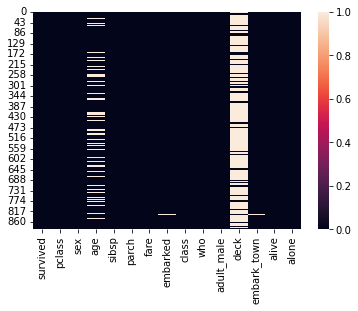

In [25]:
import seaborn as sns
sns.heatmap(df.isnull())

In [27]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='age', ylabel='Density'>

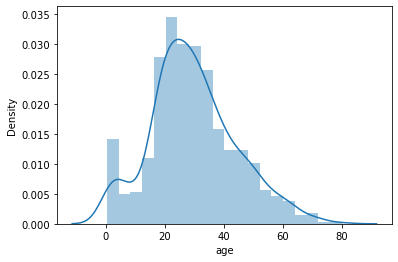

In [28]:
import seaborn as sns
sns.distplot(df['age'])

#### Here data is normal distribution

In [30]:
mean = np.mean(df['age'])

In [31]:
mean

29.69911764705882

In [36]:
df['age_mean'] = df['age'].fillna(np.mean(df['age']))

In [46]:
df[['age_mean' ,'age']]

,age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


### 2.Median Value Imputation

#### data is into normally distribution but we have just doing practise here so we replace null values of age by median imputation.

median value Imputation is used when outliers are present in the dataset

<AxesSubplot:xlabel='age'>

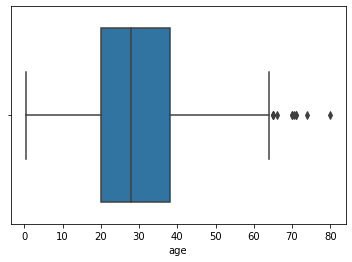

In [51]:
sns.boxplot(df['age'])

In [58]:
median = df['age'].median()

In [59]:
median

28.0

In [60]:
df['age_median'] = df['age'].fillna(median)

In [62]:
df['age_median']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age_median, Length: 891, dtype: float64

In [64]:
df[['age_median' , 'age']]

,age_median,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,28.0,NaN
889,26.0,26.0


### 3.Mode Value Imputation

### Mode value Imputation is used in categorical values or categorical variable.

In [65]:
df['embark_town']

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

In [67]:
df['embark_town'].isnull().sum()

2

In [70]:
df[df['embark_town'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [77]:
import statistics as stat
from statistics import mode

In [78]:
stat.mode(df['embark_town'])

'Southampton'

In [79]:
mode = stat.mode(df['embark_town'])

In [80]:
mode

'Southampton'

In [81]:
df['embark_town_age'] = df['embark_town'].fillna(mode)

In [82]:
df['embark_town_age'].isnull().sum()

0

In [83]:
df[df['embark_town_age'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median,embark_town_age


In [84]:
df[['embark_town_age' , 'embark_town']]

,embark_town_age,embark_town
0,Southampton,Southampton
1,Cherbourg,Cherbourg
2,Southampton,Southampton
3,Southampton,Southampton
4,Southampton,Southampton
...,...,...
886,Southampton,Southampton
887,Southampton,Southampton
888,Southampton,Southampton
889,Cherbourg,Cherbourg


#### Q3: Explain the imbalanced data. What will happen if imbalanced data is not handled?

Ans:

Imbalance data is nothing but target variable data is into imbalance proportion. 

i.e count of categories of output data into imbalance proportion.

if imbalanced data is not handled then model performs inaccurate prediction.

means it train the model on imbalanced data then it results is also inaccurate.

#### Q4: What are Up-sampling and Down-sampling? Explain with an example when up-sampling and down-sampling are required.

Ans:

Up-sampling :
    
    Up-sampling is the technique of to increase the count of minority class as compare to majority class.
    
Down-sampling :
    
    Down-sampling is the technique of to decrease the count of majority class as compare to minority class.

In [119]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median,embark_town_age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0,22.0,Southampton
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0,38.0,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0,26.0,Southampton
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0,35.0,Southampton
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0,35.0,Southampton


In [120]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

### Perform Up-Sample

In [121]:
from sklearn.utils import resample

In [122]:
df_majority = df[df['survived'] == 0]
df_minority = df[df['survived'] == 1]

In [123]:
df_minority_upsample = resample(df_minority , replace = True , n_samples = len(df_majority) , random_state = 42)

In [124]:
df_minority_upsample

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median,embark_town_age
288,1,2,male,42.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True,42.000000,42.0,Southampton
697,1,3,female,NaN,0,0,7.7333,Q,Third,woman,False,NaN,Queenstown,yes,True,29.699118,28.0,Queenstown
298,1,1,male,NaN,0,0,30.5000,S,First,man,True,C,Southampton,yes,True,29.699118,28.0,Southampton
208,1,3,female,16.0,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True,16.000000,16.0,Queenstown
483,1,3,female,63.0,0,0,9.5875,S,Third,woman,False,NaN,Southampton,yes,True,63.000000,63.0,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,1,3,male,27.0,0,0,7.7958,S,Third,man,True,NaN,Southampton,yes,True,27.000000,27.0,Southampton
387,1,2,female,36.0,0,0,13.0000,S,Second,woman,False,NaN,Southampton,yes,True,36.000000,36.0,Southampton
369,1,1,female,24.0,0,0,69.3000,C,First,woman,False,B,Cherbourg,yes,True,24.000000,24.0,Cherbourg
165,1,3,male,9.0,0,2,20.5250,S,Third,child,False,NaN,Southampton,yes,False,9.000000,9.0,Southampton


In [125]:
df_minority_upsample['survived'].value_counts()

1    549
Name: survived, dtype: int64

In [126]:
df_upsample = pd.concat([df_minority_upsample , df_majority])

In [127]:
df_upsample

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median,embark_town_age
288,1,2,male,42.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True,42.000000,42.0,Southampton
697,1,3,female,NaN,0,0,7.7333,Q,Third,woman,False,NaN,Queenstown,yes,True,29.699118,28.0,Queenstown
298,1,1,male,NaN,0,0,30.5000,S,First,man,True,C,Southampton,yes,True,29.699118,28.0,Southampton
208,1,3,female,16.0,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True,16.000000,16.0,Queenstown
483,1,3,female,63.0,0,0,9.5875,S,Third,woman,False,NaN,Southampton,yes,True,63.000000,63.0,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True,25.000000,25.0,Southampton
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False,39.000000,39.0,Queenstown
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,27.000000,27.0,Southampton
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,29.699118,28.0,Southampton


In [131]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [132]:
df_upsample['survived'].value_counts()

1    549
0    549
Name: survived, dtype: int64

### Perform Down-sampling

In [133]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [134]:
df_majority_downsample = resample(df_majority , replace = False , n_samples = len(df_minority) , random_state = 42)

In [135]:
df_majority_downsample

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median,embark_town_age
312,0,2,female,26.0,1,1,26.0000,S,Second,woman,False,NaN,Southampton,no,False,26.000000,26.0,Southampton
124,0,1,male,54.0,0,1,77.2875,S,First,man,True,D,Southampton,no,False,54.000000,54.0,Southampton
783,0,3,male,NaN,1,2,23.4500,S,Third,man,True,NaN,Southampton,no,False,29.699118,28.0,Southampton
167,0,3,female,45.0,1,4,27.9000,S,Third,woman,False,NaN,Southampton,no,False,45.000000,45.0,Southampton
772,0,2,female,57.0,0,0,10.5000,S,Second,woman,False,E,Southampton,no,True,57.000000,57.0,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,0,3,male,7.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False,7.000000,7.0,Queenstown
583,0,1,male,36.0,0,0,40.1250,C,First,man,True,A,Cherbourg,no,True,36.000000,36.0,Cherbourg
791,0,2,male,16.0,0,0,26.0000,S,Second,man,True,NaN,Southampton,no,True,16.000000,16.0,Southampton
800,0,2,male,34.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,34.000000,34.0,Southampton


In [139]:
df_majority_downsample['survived'].value_counts()

0    342
Name: survived, dtype: int64

In [140]:
df_downsample = pd.concat([df_majority_downsample , df_minority])

In [141]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [142]:
df_downsample['survived'].value_counts()

0    342
1    342
Name: survived, dtype: int64

In [144]:
df_downsample.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median,embark_town_age
312,0,2,female,26.0,1,1,26.0000,S,Second,woman,False,NaN,Southampton,no,False,26.000000,26.0,Southampton
124,0,1,male,54.0,0,1,77.2875,S,First,man,True,D,Southampton,no,False,54.000000,54.0,Southampton
783,0,3,male,NaN,1,2,23.4500,S,Third,man,True,NaN,Southampton,no,False,29.699118,28.0,Southampton
167,0,3,female,45.0,1,4,27.9000,S,Third,woman,False,NaN,Southampton,no,False,45.000000,45.0,Southampton
772,0,2,female,57.0,0,0,10.5000,S,Second,woman,False,E,Southampton,no,True,57.000000,57.0,Southampton


#### Q5: What is data Augmentation? Explain SMOTE.

Ans:

Data augmentation is a technique of artificially increasing the training set by 

creating modified copies of a dataset using existing data.

SMOTE is an algorithm that performs data augmentation by creating synthetic data points based on the original data points. 

SMOTE stands for Synthetic Minority Oversampling Technique.

The method was proposed in a 2002 paper in the Journal of Artificial Intelligence Research. 

SMOTE is an improved method of dealing with imbalanced data in classification problems.

Imbalanced data is data in which observed frequencies are very different across the different possible values 

of a categorical variable. Basically, there are many observations of some type and very few of another type.

SMOTE is a solution when you have imbalanced data.

#### Q6: What are outliers in a dataset? Why is it essential to handle outliers?

Ans:

outliers are those data points which is on the abnormal distance from other data points or range of data points.

Anamoly detection is nothing but outliers detection.

Those data points which is apart of lower dimension and upper dimension.

It is detected by box plot.

where , 

Quadrant1 at 25 %

Quadrant2 = median at 50 %

Quadrant3 at 75 %


lower_dimension = Q1 - (whisker_width * IQR)

higher_dimension = Q3 + (whisker_width * IQR)

#### Interquartile Range(IQR)

IQR = Q3 - Q1

whisker_width = 1.5

Essential to handle outliers:

One of the most important steps as part of data preprocessing is detecting and treating the outliers 

as they can negatively affect the statistical analysis and the training process of a machine learning algorithm 

resulting in lower accuracy.

<AxesSubplot:>

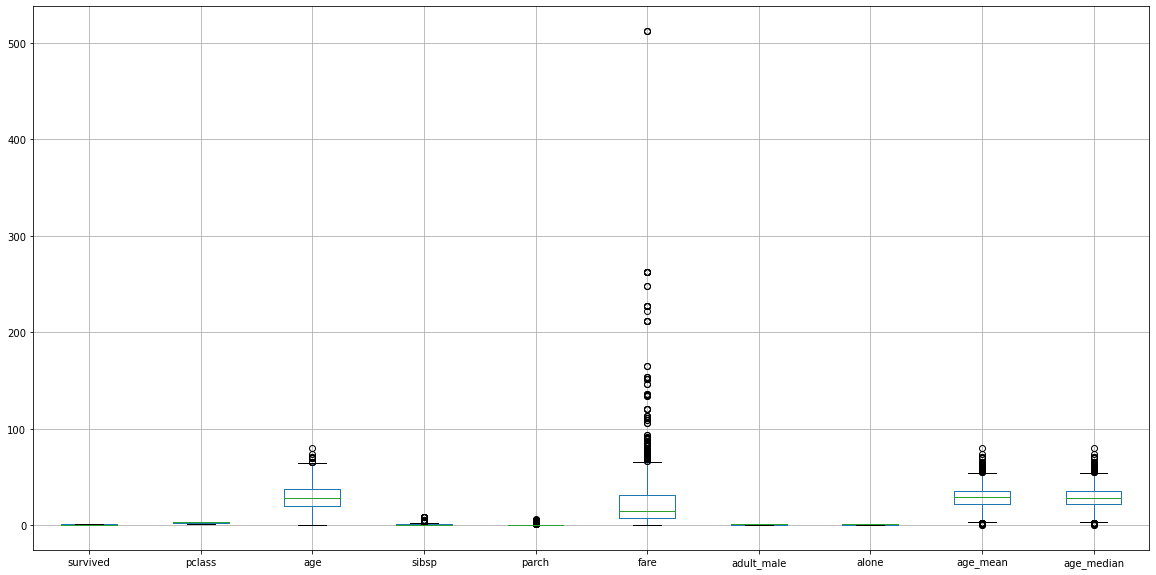

In [150]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
df.boxplot()

#### Q7: You are working on a project that requires analyzing customer data. However, you notice that some of the data is missing. What are some techniques you can use to handle the missing data in your analysis?

If customer data is normally distribued then use Mean Imputation Technique.

If customer data contains outliers then use Median Imputation Technique.

If customer data has categories data and tha data contain null values  then use Mode Imputation Technique.

#### Q8: You are working with a large dataset and find that a small percentage of the data is missing. What are some strategies you can use to determine if the missing data is missing at random or if there is a pattern to the missing data?

Ans:

If there is small percentage of data is missing then we are not to delete the data.

we try to replace the data by using these technique,

If data is normally distribued then use Mean Imputation Technique.

If data contains outliers then use Median Imputation Technique.

If data has categories data and tha data contain null values then use Mode Imputation Technique.


#### Q9: Suppose you are working on a medical diagnosis project and find that the majority of patients in the dataset do not have the condition of interest, while a small percentage do. What are some strategies you can use to evaluate the performance of your machine learning model on this imbalanced dataset?

we are use here SMOTE

#### Q10: When attempting to estimate customer satisfaction for a project, you discover that the dataset is unbalanced, with the bulk of customers reporting being satisfied. What methods can you employ to balance the dataset and down-sample the majority class?

Ans:

We use here down-sample method for to downsample the majority class

#### Q11: You discover that the dataset is unbalanced with a low percentage of occurrences while working on a project that requires you to estimate the occurrence of a rare event. What methods can you employ to balance the dataset and up-sample the minority class?

Ans:

First we check value_counts() of categorical variable then we go for up-sample method for upsample the minority class